In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from dtuimldmtools import *
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import torch
from sklearn.preprocessing import PolynomialFeatures
from dtuimldmtools import rlr_validate

In [4]:
df = pd.read_csv(r'C:\Users\malth\OneDrive - Danmarks Tekniske Universitet\Porgrammering\02445---Individuel-assignment-\HR_data.csv')
df

,Unnamed: 0,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,0,77.965186,78.000,3.345290,73.23,83.37,22924.945,round_3,phase3,1,1,1,D1_1
1,1,70.981097,70.570,2.517879,67.12,78.22,21930.400,round_3,phase2,1,1,5,D1_1
2,2,73.371959,73.360,3.259569,67.88,80.22,21647.085,round_3,phase1,1,1,0,D1_1
3,3,78.916822,77.880,4.054595,72.32,84.92,25258.905,round_2,phase3,1,1,1,D1_1
4,4,77.322226,74.550,6.047603,70.52,90.15,23890.565,round_2,phase2,1,1,5,D1_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,163,73.594539,72.380,9.474556,57.43,93.53,21482.985,round_4,phase2,14,0,8,D1_2
164,164,57.839897,54.130,6.796647,52.97,74.14,16825.740,round_4,phase1,14,0,0,D1_2
165,165,64.237295,65.195,3.589241,58.97,72.63,18691.065,round_1,phase3,14,0,1,D1_2
166,166,70.834320,70.440,2.391160,66.65,76.07,20753.005,round_1,phase2,14,0,4,D1_2


In [25]:
features = df[['HR_Mean','HR_Median','HR_std','HR_Min','HR_Max','HR_AUC']]
x_standardized = (features - features.mean()) / features.std()
x = torch.tensor(x_standardized.values, dtype=torch.float32)
y = torch.tensor(df['Frustrated'].values, dtype=torch.long)
groups = df['Individual']
x_standardized

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC
0,0.260749,0.392342,-0.631771,0.824668,-0.445924,-0.131939
1,-0.670301,-0.524777,-0.825667,-0.042982,-0.849385,-0.409001
2,-0.351575,-0.180394,-0.651859,0.064942,-0.692701,-0.487928
3,0.387612,0.377530,-0.465551,0.695444,-0.324494,0.518262
4,0.175036,-0.033507,0.001493,0.439835,0.085234,0.137066
...,...,...,...,...,...,...
163,-0.321902,-0.301360,0.804569,-1.419009,0.350030,-0.533643
164,-2.422157,-2.554041,0.177024,-2.052351,-1.169020,-1.831071
165,-1.569319,-1.188238,-0.574603,-1.200322,-1.287316,-1.311424
166,-0.689868,-0.540823,-0.855363,-0.109724,-1.017820,-0.737003


In [7]:
# class ANNClassifier(torch.nn.Module):
#     def __init__(self,input_dim, hidden_units, output_dim):
#         super(ANNClassifier,self).__init__()
#         self.net = torch.nn.Sequential(
#             torch.nn.Linear(input_dim,hidden_units),
#             torch.nn.ReLU(),
#             torch.nn.Linear(hidden_units, hidden_units),
#             torch.nn.ReLU(),
#             torch.nn.Linear(hidden_units, hidden_units),
#             torch.nn.ReLU(),
#             torch.nn.Linear(hidden_units, hidden_units),
#             torch.nn.ReLU(),
#             torch.nn.Dropout(0.3),
#             torch.nn.Linear(hidden_units,output_dim)
#         )
#     def forward(self,x):
#         return self.net(x)
    
# #Hyperparameters:
# input_dim = x.shape[1]
# hidden_units = 132
# output_dim = 10

# epochs = 5000
# learning_rate = 0.001

# # Group K-Fold:
# gkf = GroupKFold(n_splits=5)
# ann_accuracy = []

# for train_idx, test_idx in gkf.split(x,y, groups = groups):
#     model = ANNClassifier(input_dim,hidden_units,output_dim)
#     optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
#     criterion = torch.nn.CrossEntropyLoss()

#     X_train, X_test = x[train_idx], x[test_idx]
#     y_train, y_test = y[train_idx], y[test_idx]

#     for epoch in range(epochs):
#         model.train()
#         optimizer.zero_grad()
#         outputs = model(X_train)
#         loss = criterion(outputs, y_train)
#         loss.backward()
#         optimizer.step()
#         if epoch % 10 == 0:
#             print(f"Epoch {epoch}: loss = {loss.item():.4f}")

#     #Evaluation of the model:
#     model.eval()
#     with torch.no_grad():
#         y_pred = model(X_test)
#         y_pred_labels = torch.argmax(y_pred,dim = 1)
#         acc = accuracy_score(y_test.numpy(), y_pred_labels.numpy())
#         ann_accuracy.append(acc)

# print(f"ANN Average Accuracy: {np.mean(ann_accuracy):3f}")

ChatGPT was used for some of this code, it was used for helping to make the cross-validation and the plots, where it also was used to help with the debugging. 


--- Fold 1 ---
Fold 1 | Iteration 500 | Loss: 2.4044 | Train Acc: 0.0455 | Test Acc: 0.0833
Fold 1 | Iteration 500 | Loss: 2.3870 | Train Acc: 0.2727 | Test Acc: 0.1111
Fold 1 | Iteration 500 | Loss: 2.3705 | Train Acc: 0.3030 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 2.3533 | Train Acc: 0.3030 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 2.3344 | Train Acc: 0.3030 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 2.3129 | Train Acc: 0.3030 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 2.2878 | Train Acc: 0.3030 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 2.2585 | Train Acc: 0.3030 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 2.2237 | Train Acc: 0.3030 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 2.1834 | Train Acc: 0.3030 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 2.1372 | Train Acc: 0.3030 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 2.0866 | Train Acc: 0.3030 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 2.0345 | Train Acc: 0.3030 | 

c:\Users\malth\Miniconda3\envs\dtu02450\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 1 | Iteration 500 | Loss: 1.7272 | Train Acc: 0.3030 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 1.7223 | Train Acc: 0.3030 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 1.7174 | Train Acc: 0.3030 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 1.7118 | Train Acc: 0.3030 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 1.7062 | Train Acc: 0.3409 | Test Acc: 0.1111
Fold 1 | Iteration 500 | Loss: 1.7006 | Train Acc: 0.3561 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 1.6946 | Train Acc: 0.3258 | Test Acc: 0.1111
Fold 1 | Iteration 500 | Loss: 1.6879 | Train Acc: 0.3258 | Test Acc: 0.1111
Fold 1 | Iteration 500 | Loss: 1.6809 | Train Acc: 0.3333 | Test Acc: 0.1111
Fold 1 | Iteration 500 | Loss: 1.6739 | Train Acc: 0.3409 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 1.6671 | Train Acc: 0.3561 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 1.6606 | Train Acc: 0.3561 | Test Acc: 0.1389
Fold 1 | Iteration 500 | Loss: 1.6546 | Train Acc: 0.3788 | Test Acc: 0.1111

c:\Users\malth\Miniconda3\envs\dtu02450\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 2 | Iteration 500 | Loss: 2.4155 | Train Acc: 0.0758 | Test Acc: 0.1944
Fold 2 | Iteration 500 | Loss: 2.3977 | Train Acc: 0.1515 | Test Acc: 0.1944
Fold 2 | Iteration 500 | Loss: 2.3803 | Train Acc: 0.2348 | Test Acc: 0.1667
Fold 2 | Iteration 500 | Loss: 2.3621 | Train Acc: 0.2576 | Test Acc: 0.0556
Fold 2 | Iteration 500 | Loss: 2.3413 | Train Acc: 0.2500 | Test Acc: 0.0278
Fold 2 | Iteration 500 | Loss: 2.3168 | Train Acc: 0.2424 | Test Acc: 0.0278
Fold 2 | Iteration 500 | Loss: 2.2872 | Train Acc: 0.2348 | Test Acc: 0.0278
Fold 2 | Iteration 500 | Loss: 2.2518 | Train Acc: 0.2348 | Test Acc: 0.0556
Fold 2 | Iteration 500 | Loss: 2.2101 | Train Acc: 0.2348 | Test Acc: 0.0556
Fold 2 | Iteration 500 | Loss: 2.1625 | Train Acc: 0.2348 | Test Acc: 0.0556
Fold 2 | Iteration 500 | Loss: 2.1107 | Train Acc: 0.2348 | Test Acc: 0.0556
Fold 2 | Iteration 500 | Loss: 2.0580 | Train Acc: 0.2348 | Test Acc: 0.0556
Fold 2 | Iteration 500 | Loss: 2.0106 | Train Acc: 0.2500 | Test Acc: 0.0556

c:\Users\malth\Miniconda3\envs\dtu02450\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 3 | Iteration 500 | Loss: 1.7836 | Train Acc: 0.3333 | Test Acc: 0.1944
Fold 3 | Iteration 500 | Loss: 1.7726 | Train Acc: 0.3333 | Test Acc: 0.1944
Fold 3 | Iteration 500 | Loss: 1.7638 | Train Acc: 0.3409 | Test Acc: 0.1667
Fold 3 | Iteration 500 | Loss: 1.7578 | Train Acc: 0.3409 | Test Acc: 0.1667
Fold 3 | Iteration 500 | Loss: 1.7533 | Train Acc: 0.3485 | Test Acc: 0.1667
Fold 3 | Iteration 500 | Loss: 1.7492 | Train Acc: 0.3485 | Test Acc: 0.1667
Fold 3 | Iteration 500 | Loss: 1.7442 | Train Acc: 0.3485 | Test Acc: 0.1667
Fold 3 | Iteration 500 | Loss: 1.7383 | Train Acc: 0.3485 | Test Acc: 0.1667
Fold 3 | Iteration 500 | Loss: 1.7322 | Train Acc: 0.3333 | Test Acc: 0.1667
Fold 3 | Iteration 500 | Loss: 1.7262 | Train Acc: 0.3333 | Test Acc: 0.1944
Fold 3 | Iteration 500 | Loss: 1.7200 | Train Acc: 0.3333 | Test Acc: 0.1944
Fold 3 | Iteration 500 | Loss: 1.7137 | Train Acc: 0.3409 | Test Acc: 0.1944
Fold 3 | Iteration 500 | Loss: 1.7075 | Train Acc: 0.3409 | Test Acc: 0.1944

c:\Users\malth\Miniconda3\envs\dtu02450\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 4 | Iteration 500 | Loss: 2.3967 | Train Acc: 0.2576 | Test Acc: 0.2222
Fold 4 | Iteration 500 | Loss: 2.3754 | Train Acc: 0.2879 | Test Acc: 0.2500
Fold 4 | Iteration 500 | Loss: 2.3526 | Train Acc: 0.2879 | Test Acc: 0.2500
Fold 4 | Iteration 500 | Loss: 2.3271 | Train Acc: 0.2955 | Test Acc: 0.2500
Fold 4 | Iteration 500 | Loss: 2.2974 | Train Acc: 0.2803 | Test Acc: 0.2222
Fold 4 | Iteration 500 | Loss: 2.2624 | Train Acc: 0.2652 | Test Acc: 0.1667
Fold 4 | Iteration 500 | Loss: 2.2214 | Train Acc: 0.2348 | Test Acc: 0.2500
Fold 4 | Iteration 500 | Loss: 2.1743 | Train Acc: 0.2045 | Test Acc: 0.2500
Fold 4 | Iteration 500 | Loss: 2.1221 | Train Acc: 0.1894 | Test Acc: 0.1944
Fold 4 | Iteration 500 | Loss: 2.0668 | Train Acc: 0.1894 | Test Acc: 0.1667
Fold 4 | Iteration 500 | Loss: 2.0125 | Train Acc: 0.1894 | Test Acc: 0.1667
Fold 4 | Iteration 500 | Loss: 1.9643 | Train Acc: 0.1894 | Test Acc: 0.1667
Fold 4 | Iteration 500 | Loss: 1.9268 | Train Acc: 0.2576 | Test Acc: 0.2222

c:\Users\malth\Miniconda3\envs\dtu02450\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 5 | Iteration 500 | Loss: 2.2142 | Train Acc: 0.2778 | Test Acc: 0.2083
Fold 5 | Iteration 500 | Loss: 2.1703 | Train Acc: 0.2778 | Test Acc: 0.2083
Fold 5 | Iteration 500 | Loss: 2.1224 | Train Acc: 0.2778 | Test Acc: 0.2083
Fold 5 | Iteration 500 | Loss: 2.0733 | Train Acc: 0.2778 | Test Acc: 0.2083
Fold 5 | Iteration 500 | Loss: 2.0270 | Train Acc: 0.2778 | Test Acc: 0.2083
Fold 5 | Iteration 500 | Loss: 1.9889 | Train Acc: 0.2778 | Test Acc: 0.2083
Fold 5 | Iteration 500 | Loss: 1.9637 | Train Acc: 0.2778 | Test Acc: 0.2083
Fold 5 | Iteration 500 | Loss: 1.9513 | Train Acc: 0.2778 | Test Acc: 0.2083
Fold 5 | Iteration 500 | Loss: 1.9452 | Train Acc: 0.2778 | Test Acc: 0.2083
Fold 5 | Iteration 500 | Loss: 1.9386 | Train Acc: 0.2986 | Test Acc: 0.1667
Fold 5 | Iteration 500 | Loss: 1.9292 | Train Acc: 0.2847 | Test Acc: 0.1667
Fold 5 | Iteration 500 | Loss: 1.9175 | Train Acc: 0.2778 | Test Acc: 0.1667
Fold 5 | Iteration 500 | Loss: 1.9058 | Train Acc: 0.2778 | Test Acc: 0.1667

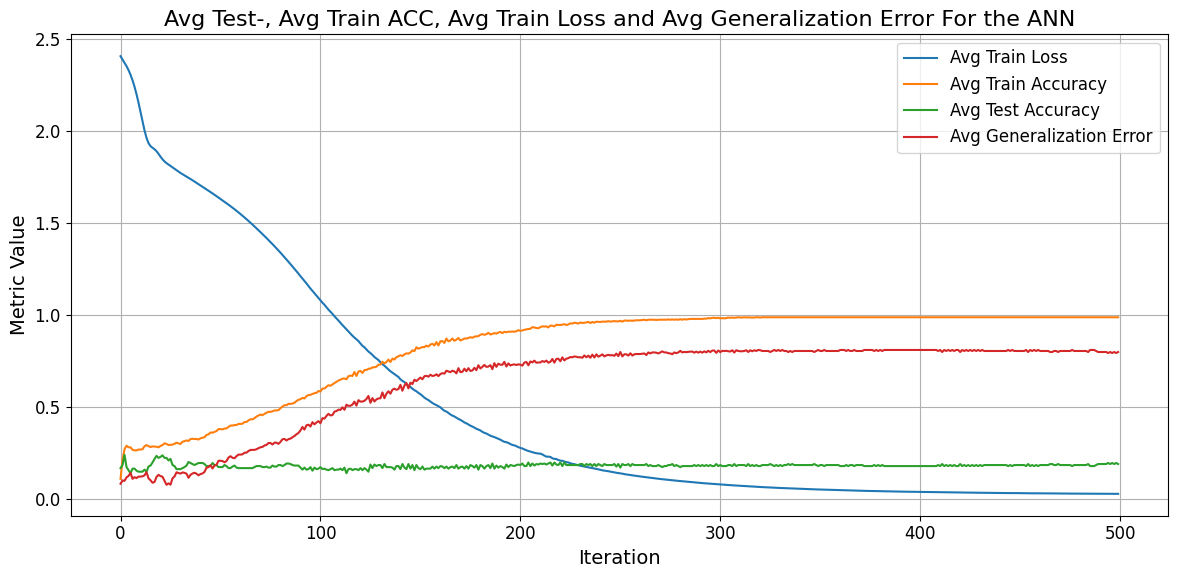

|Ann evaluation|

 ANN Average Test Accuracy: 0.19

 ANN Average Training Accuracy: 0.81

 ANN Average Generalization Error: 0.56

|Log Reg evaluation|

 Log Average Training Accuracy: 0.31

 Log Average Test Accuarcies: 0.29

 Log Average Generalization Error: 0.02


In [43]:
class ANNClassifier(torch.nn.Module):
    def __init__(self,input_dim, hidden_units, output_dim):
        super(ANNClassifier,self).__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(input_dim,hidden_units),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_units, hidden_units),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_units, hidden_units),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_units, hidden_units),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_units,output_dim)
        )
    def forward(self,x):
        return self.net(x)

# Hyperparameters
input_dim = x.shape[1]
hidden_units = 132
output_dim = 11
iteration = 500
learning_rate = 0.001

# Group K-Fold
gkf = GroupKFold(n_splits=5)

# ANN lists for store metrics per fold
all_train_losses = []
all_train_accuracies = []
all_test_accuracies = []
all_generalization_errors = []
ann_accuracy = []

# Log list for store metrics per fold
log_all_train_accuracies = []
log_all_test_accuracies = []
log_all_generalization_errors = []
log_accuracy = []



for fold, (train_idx, test_idx) in enumerate(gkf.split(x, y, groups=groups)):
    print(f"\n--- Fold {fold+1} ---")

    model = ANNClassifier(input_dim, hidden_units, output_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-10)
    criterion = torch.nn.CrossEntropyLoss()

    X_train, X_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    #ANN fold evaluation indx: 
    fold_train_losses = []
    fold_train_accuracies = []
    fold_test_accuracies = []
    fold_generalization_errors = []
    
    #Log fold evaluation indx: 
    log_all_train_accuracies = []
    log_all_test_accuracies = []
    log_all_generalization_errors = []
    log_accuracy = []
    

    # Logistic Regression model: 
    log_model = LogisticRegression(multi_class="multinomial", max_iter=iteration)
    log_model.fit(X_train, y_train)
    y_pred_train_log = log_model.predict(X_train)
    y_pred_test_log = log_model.predict(X_test)

    #Log Reg model evaluatation:     
    log_train_acc = accuracy_score(y_train, y_pred_train_log)
    log_test_acc = accuracy_score(y_test, y_pred_test_log)
    log_generalization_error = abs(log_train_acc - log_test_acc)

    #Storeas the Log Reg model evaluations 
    log_all_train_accuracies.append(log_train_acc)
    log_all_test_accuracies.append(log_test_acc)
    log_all_generalization_errors.append(log_generalization_error)
    log_accuracy.append(log_test_acc)

    for iterations in range(iteration):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            train_preds = model(X_train)
            train_labels = torch.argmax(train_preds, dim=1)
            train_acc = accuracy_score(y_train.numpy(), train_labels.numpy())

            test_preds = model(X_test)
            test_labels = torch.argmax(test_preds, dim=1)
            test_acc = accuracy_score(y_test.numpy(), test_labels.numpy())

        # ANN evaluation for each fold 
        fold_train_losses.append(loss.item())
        fold_train_accuracies.append(train_acc)
        fold_test_accuracies.append(test_acc)
        fold_generalization_errors.append(abs(train_acc - test_acc))

        #Tjeks if the models overfits
        if iteration % 100 == 0:
            print(f"Fold {fold+1} | Iteration {iteration} | Loss: {loss.item():.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

    #Stores all the training information in the respectively indx for ANN
    all_train_losses.append(fold_train_losses)
    all_train_accuracies.append(fold_train_accuracies)
    all_test_accuracies.append(fold_test_accuracies)
    all_generalization_errors.append(fold_generalization_errors)
    ann_accuracy.append(fold_test_accuracies[-1])


# Average metrics over folds for ANN 
train_losses_avg = np.mean(all_train_losses, axis=0)
train_accuracies_avg = np.mean(all_train_accuracies, axis=0)
test_accuracies_avg = np.mean(all_test_accuracies, axis=0)
generalization_errors_avg = np.mean(all_generalization_errors, axis=0)

#Average metrics over folds for Log
log_train_accuracies_avg = np.mean(log_all_train_accuracies)
log_test_accuracies_avg = np.mean(log_all_test_accuracies)
log_generalization_errors_avg = np.mean(log_all_generalization_errors)

#ANN plot over results
plt.figure(figsize=(12,6))
plt.plot(train_losses_avg, label='Avg Train Loss')
plt.plot(train_accuracies_avg, label='Avg Train Accuracy')
plt.plot(test_accuracies_avg, label='Avg Test Accuracy')
plt.plot(generalization_errors_avg, label='Avg Generalization Error')
plt.xlabel('Iteration')
plt.ylabel('Metric Value')
plt.title('Avg Test-, Avg Train ACC, Avg Train Loss and Avg Generalization Error For the ANN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Averege evaluation of ANN 
print(f"|Ann evaluation|")
print(f"\n ANN Average Test Accuracy: {np.mean(ann_accuracy):.2f}")
print(f"\n ANN Average Training Accuracy: {np.mean(fold_train_accuracies):.2f}")
print(f"\n ANN Average Generalization Error: {np.mean(fold_generalization_errors):.2f}\n")

#Average evaluation of Log Reg
print(f"|Log Reg evaluation|")
print(f"\n Log Average Training Accuracy: {log_train_accuracies_avg:.2f}")
print(f"\n Log Average Test Accuarcies: {log_test_accuracies_avg:.2f}")
print(f"\n Log Average Generalization Error: {log_generalization_errors_avg:.2f}")